# Problem 1 K-mean

In [134]:
import math
import random
import numpy as np

In [271]:
# Read the data from the realdata.txt
x_list=[]
y_list=[]
data=[]

f=open('realdata.txt')
lines = f.readlines()            
for line in lines:
    re= line[:-1].split('\t')
    x_list.append(float(re[1]))
    y_list.append(float(re[2]))
    data.append([float(re[1]),float(re[2])])
leng=len(x_list)
print(np.array(data).shape)

(800, 2)


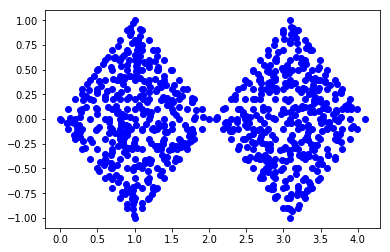

In [251]:
import matplotlib.pyplot as plt
plt.plot(x_list, y_list, 'bo')
plt.show()

In [176]:
# This is the naive k-mean funtion I write at first.
# The drawback is that it can only handle 2-dimension datas
# So I write another one latter

def kmean(x, y, cx, cy, t):
    for i in range(t):
        n=len(cx)
        p=[]
        ncx= [0]*n
        ncy= [0]*n
        ncxnum= [0]*n
        ncynum= [0]*n
        for j in range(len(x)):
            odis= 999999
            cluster=0
            for k in range(n):
                newdis= dist(x[j], y[j], cx[k], cy[k])
                if(newdis< odis):
                    odis= newdis
                    cluster= k
            ncx[cluster]+= x[j]
            ncy[cluster]+= y[j]
            ncxnum[cluster]+=1
            ncynum[cluster]+=1
        for k in range(n):
            print(ncxnum[k],ncynum[k])
        
        sumdis=0
        count=0
        for k in range(n):
            if(ncxnum[k]>0):
                ncx[k]= ncx[k]/ncxnum[k]
                ncy[k]= ncy[k]/ncynum[k]
                cdis = dist(ncx[k],ncy[k],cx[k],cy[k])
                sumdis+=cdis
            else:
                count+=1
        if(count==0 and sumdis<=0.01):
            return (ncx, ncy)
        
        l=0
        for k in range(n):
            if ncxnum[k]==0:
                continue
            cx[l]=ncx[k]
            cy[l]=ncy[k]
            l+=1
        cx=cx[:l]
        cy=cy[:l]    
    return cx, cy


def dist(x1, y1, x2, y2):
    return math.sqrt( pow(x1-x2,2) + pow(y1-y2,2))

In [177]:
cx=[1, 3, 4]
cy=[1, -1, 4]
t=10
kmean(x_list, y_list, cx, cy, t)

399 399
401 401
0 0
400 400
400 400


([1.0043700999999998, 3.0840872250000024],
 [0.0044222525, -0.002055799999999997])

In [268]:
# This is my final version of K-mean algorithm
class Kmean:
    def __init__(self, data ,c_num, itor):
        self.data= data
        self.length= np.array(data).shape[0]
        self.dim= np.array(data).shape[1]
        self.c_num= c_num
        self.itoration= itor
    
    def Eu_dist(self, x, y):
        if(len(x)!=len(y)):
            return False
        sum=0
        for i in range(len(x)):
            sum+= pow(x[i]-y[i],2)
        
        return math.sqrt(sum)
    
    def rand_centroid(self):
        maxv=[-999999]*self.dim
        minv=[999999]*self.dim
        for i in range(len(self.data)):
            for j in range(len(self.data[i])):
                if self.data[i][j] >= maxv[j]:
                    maxv[j]=self.data[i][j]
                if self.data[i][j] <= minv[j]:
                    minv[j]=self.data[i][j]
        #print(maxv)
        #print(minv)
        rand_cent=[]
        for i in range(self.c_num):
            temp=[]
            for j in range(self.dim):
                x=random.uniform(minv[j],maxv[j])
                temp.append(x)
            rand_cent.append(temp)    
        #print(rand_c)
        return rand_cent
    
    def draw_graph(self, data, y_pred, centroids): # 2-dimension
        cnum=len(centroids)
        if cnum>6:
            return False
        color=['ro','bo','yo','go','co','mo']#ko
        x_list=[[] for i in range(cnum)]
        y_list=[[] for i in range(cnum)]
        cx_list=[0]*cnum
        cy_list=[0]*cnum
        for i in range(len(data)):
            x_list[y_pred[i]].append(data[i][0])
            y_list[y_pred[i]].append(data[i][1])
        for i in range(cnum):
            plt.plot(x_list[i], y_list[i], color[i])
            plt.plot(centroids[i][0], centroids[i][1],'ko')
        plt.show()
        
    
    def kmean(self, data, centroids):
        for i in range(self.itoration):
            y_pred=[]
            for j in range(len(data)):
                odis=999999
                cluster=0
                for k in range(len(centroids)):
                    if(self.Eu_dist(data[j], centroids[k])<odis):
                        odis= self.Eu_dist(data[j], centroids[k])
                        cluster=k
                y_pred.append(cluster)
            #print(y_pred)
            
            self.draw_graph(data, y_pred, centroids)
            
            sum_c=[[0]*self.dim for w in range(len(centroids))]
            num_c=[0]*len(centroids)
            
            for j in range(len(y_pred)):
                num_c[y_pred[j]]+=1
                for k in range(self.dim):
                    sum_c[y_pred[j]][k]+=data[j][k]
            new_cnum=0
            avg_c=[]
            for j in range(len(centroids)):
                if(num_c[j]>0):
                    temp=[]
                    for k in range(self.dim):
                        temp.append(sum_c[j][k]/num_c[j])
                    avg_c.append(temp)
                    new_cnum+=1
            #print(new_cnum)
            print(centroids)
            #print(avg_c)
            
            if new_cnum==len(centroids):
                coverge_dis=0
                for j in range(len(centroids)):
                    coverge_dis+= self.Eu_dist(centroids[j],avg_c[j])
                #print(coverge_dis)
                if coverge_dis<=0.05:
                    return avg_c
         
            centroids=avg_c.copy()
            
        return avg_c
                

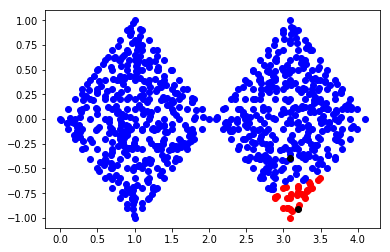

[[3.2020399697123927, -0.906628086664462], [3.08784353112496, -0.3922624411912339]]


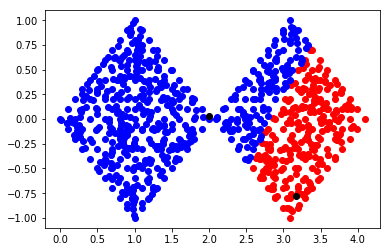

[[3.1726123870967746, -0.7741727096774195], [1.9987411521456455, 0.0324394473342003]]


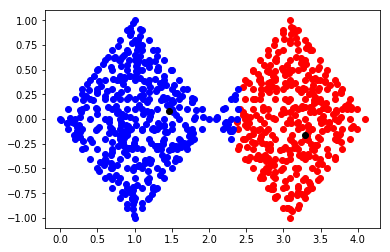

[[3.28648019066148, -0.16418252140077821], [1.4562753609576424, 0.07945025598526707]]


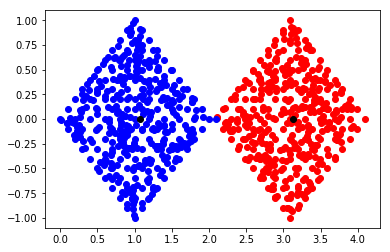

[[3.1318385105820115, -0.003957539682539678], [1.0700188933649286, 0.005787988151658767]]


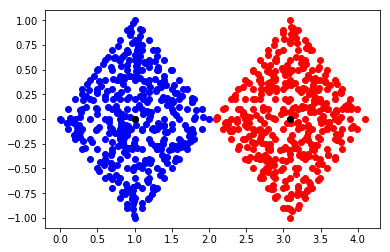

[[3.0865786716792005, -0.002060952380952378], [1.0070774064837902, 0.004411224438902743]]


[[3.0840872250000024, -0.002055799999999997],
 [1.0043700999999998, 0.0044222525]]

In [269]:
# k=2 max_iter=10
x = Kmean(data, 2, 10)
randc= x.rand_centroid()
x.kmean(data,randc)

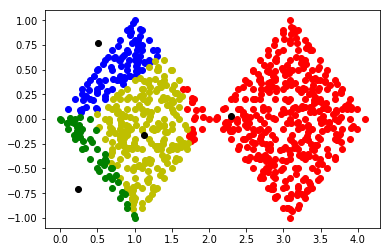

[[2.291750071455954, 0.03075600744815854], [0.508401998063205, 0.7702030277963816], [1.1243210368815495, -0.16164046091454942], [0.2349677853209227, -0.7062620023337827]]


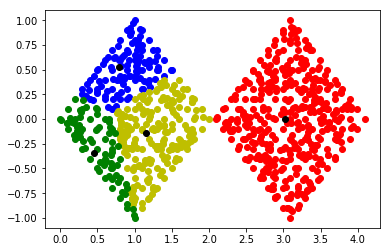

[[3.022768521428575, -0.0005007523809523811], [0.7926682424242426, 0.5251981313131313], [1.1494388434782608, -0.14509231304347833], [0.4504913921568626, -0.34248011764705877]]


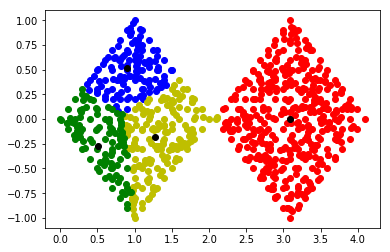

[[3.0840872250000024, -0.002055799999999997], [0.899121661016949, 0.5157994152542374], [1.2753330552763822, -0.18206997989949747], [0.5043422409638556, -0.2754639036144579]]


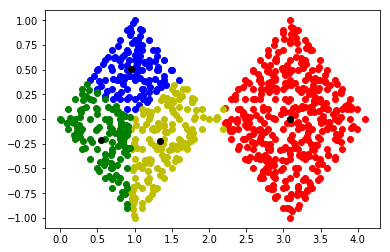

[[3.0915055843828743, -0.002150136020151131], [0.9537316048387093, 0.5067174435483872], [1.3426483720930227, -0.22011555813953487], [0.5500651775700937, -0.21656917757009347]]


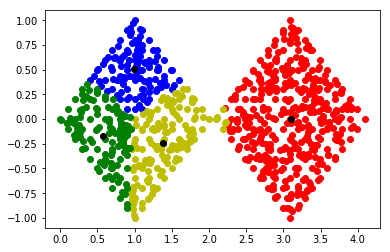

[[3.0960701696202553, -0.0021610227848101243], [0.9871645245901638, 0.5103238196721313], [1.3826473624999998, -0.24399334999999994], [0.5754273414634148, -0.17414947154471544]]


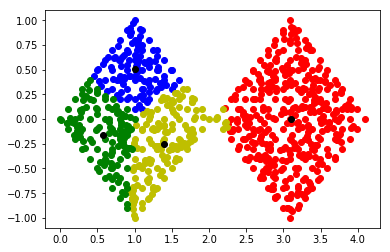

[[3.100520821882954, -0.0020033511450381625], [1.0062408934426228, 0.510343868852459], [1.3961317848101265, -0.2515740632911392], [0.578960913385827, -0.16361694488188974]]


[[3.102723515306125, -0.0018160408163265269],
 [1.0121782416666665, 0.5146829333333334],
 [1.4067156624203818, -0.2517466050955413],
 [0.586256213740458, -0.15709363358778627]]

In [270]:
# k=4, max_iter=10
x = Kmean(data, 4, 10)
randc= x.rand_centroid()
x.kmean(data,randc)